Each proposal should include the following sections:

- Title
- Introduction:
    - Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
    - Clearly state the question you will try to answer with your project
    - Identify and describe the dataset that will be used to answer the question
- Preliminary exploratory data analysis:
    - Demonstrate that the dataset can be read from the web into R 
    - Clean and wrangle your data into a tidy format
    - Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
    - Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.
- Methods:
    - Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
    - Describe at least one way that you will visualize the results
- Expected outcomes and significance:
    - What do you expect to find?
    - What impact could such findings have?
    - What future questions could this lead to?

# Classification of Hazardous/Nonhazardous Nearest Earth Objects



### ?



In [59]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

Rows: 90836 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, orbiting_body
dbl (6): id, est_diameter_min, est_diameter_max, relative_velocity, miss_dis...
lgl (2): sentry_object, hazardous

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<fct>
2162635,162635 (2000 SS164),1.19827080,2.67941497,13569.25,54839744,Earth,FALSE,16.73,FALSE
2277475,277475 (2005 WK4),0.26580000,0.59434687,73588.73,61438127,Earth,FALSE,20.00,TRUE
2512244,512244 (2015 YE18),0.72202956,1.61450717,114258.69,49798725,Earth,FALSE,17.83,FALSE
3596030,(2012 BV13),0.09650615,0.21579430,24764.30,25434973,Earth,FALSE,22.20,FALSE
3667127,(2014 GE35),0.25500869,0.57021676,42737.73,46275567,Earth,FALSE,20.09,TRUE
54138696,(2021 GY23),0.03635423,0.08129053,34297.59,40585691,Earth,FALSE,24.32,FALSE


hazardous,count
<fct>,<int>
FALSE,141
TRUE,159


orbiting_body,count
<chr>,<int>
Earth,300


est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2054304,0.4593564,54735.66,36831355,21.94227


[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


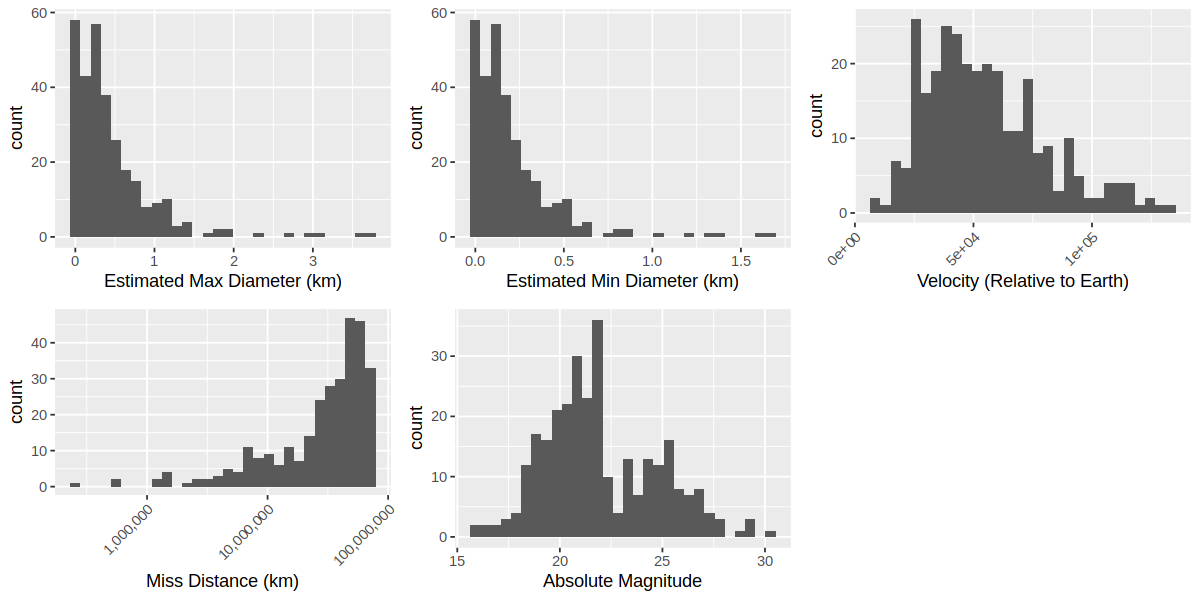

In [67]:
options(repr.plot.width = 10, repr.plot.height = 5)
url <- "https://raw.githubusercontent.com/LongTortue/DSCI100-Group-Project/main/neo.csv"
neo_data <- read_csv(url)

neo_data <- neo_data |>
mutate(sentry_object = as_factor(sentry_object), hazardous = as_factor(hazardous))
head(neo_data) # transforming the categorical variables into factors

# as the data is unbalanced (81000 false to 9000 true), we will create a new dataset that is balanced

neo_data_false <- neo_data |>
filter(hazardous == "FALSE") |>
sample_n(400)
neo_data_true <- neo_data |>
filter(hazardous == "TRUE") |>
sample_n(400)
neo_data_balanced <- rbind(neo_data_false, neo_data_true) # balanced dataset

neo_data_train <- sample_n(neo_data_balanced, 300) # training dataset

neo_count <- neo_data_train |>
group_by(hazardous) |>
summarize(count = n())
neo_count # number of observations in each class

neo_count_orbiting <- neo_data_train |>
group_by(orbiting_body) |>
summarize(count = n())
neo_count_orbiting # all observations have orbiting bodies of Earth

neo_mean <- neo_data_train |>
select(-id, -name, -orbiting_body, -sentry_object, -hazardous) |>
map_df(mean)
neo_mean # mean of predictors

neo_na_count <- sum(is.na(neo_data_train))
neo_na_count # no missing values in our dataset

# plots visualizing distribution of data, and shown next to each other
neo_plot_max_diameter <- neo_data_train |>
ggplot(aes(x = est_diameter_max)) +
geom_histogram() +
xlab("Estimated Max Diameter (km)")

neo_plot_min_diameter <- neo_data_train |>
ggplot(aes(x = est_diameter_min)) +
geom_histogram() +
xlab("Estimated Min Diameter (km)")

neo_plot_velocity <- neo_data_train |>
ggplot(aes(x = relative_velocity)) +
geom_histogram() +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
xlab("Velocity (Relative to Earth)")

neo_plot_miss_distance <- neo_data_train |>
ggplot(aes(x = miss_distance)) +
geom_histogram() +
scale_x_log10(labels = label_comma()) +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
xlab("Miss Distance (km)")

neo_plot_absolute_magnitude <- neo_data_train |>
ggplot(aes(x = absolute_magnitude)) +
geom_histogram() +
xlab("Absolute Magnitude")

plot_grid(neo_plot_max_diameter, neo_plot_min_diameter, neo_plot_velocity, 
          neo_plot_miss_distance, neo_plot_absolute_magnitude)

### Expected outcomes and significance:
Through this data analysis, we will be able to classify whether an unknown rock/object found near Earth may pose a potential risk to our safety or not. We will use different indicators such as distance, size, and speed to evaluate if a near Earth object (NEO) is hazardous (causing significant regional damage) or not. 

### What impact could such findings have?
This will have an impact on everyone's safety on Earth. With a reliable classification model, we will be able to determine whether a NEO may pose a significant risk to human life, and we will be able to decide whether or not to take action, such as evacuating areas at risk or attempting to destroy the object. Being able to classify an object's hazardousness through physical attributes allows us to be ready ahead of time and minimize potential damage.

### What future questions could this lead to?
Researchers can conduct further research on the types of damage NEOs can cause and their impacts. They can analyze the effectiveness of precautions taken and learn how to further improve these precautions to minimize potential harm. Additionally, researchers may identify more predictive factors of a NEO, and develop even better classifiers.